In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
print(df.head())
print(df.info())

Matplotlib is building the font cache; this may take a moment.


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df.isnull().sum())



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
df.dropna(subset=['TotalCharges'] , inplace=True)

print(df.shape)

(7032, 21)


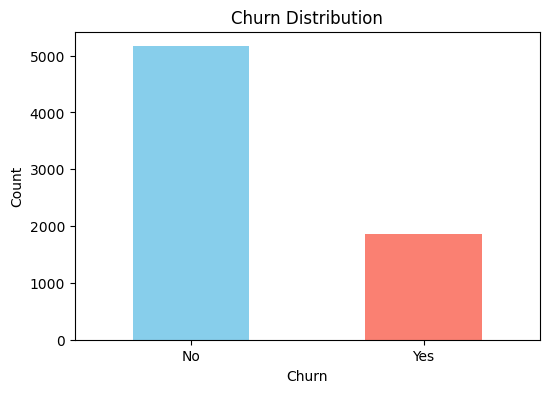

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Percentage of churn
print(df['Churn'].value_counts(normalize=True) * 100)

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


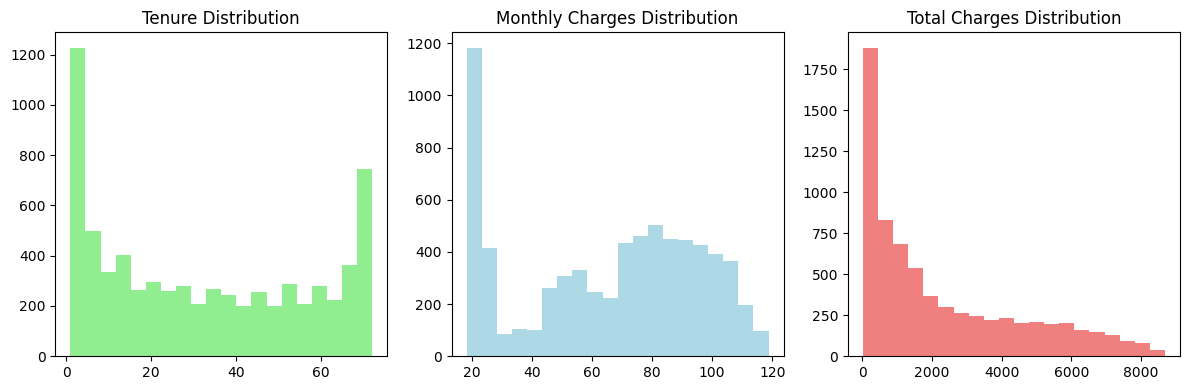

In [7]:
# Summary statistics
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['tenure'], bins=20, color='lightgreen')
plt.title('Tenure Distribution')

plt.subplot(1, 3, 2)
plt.hist(df['MonthlyCharges'], bins=20, color='lightblue')
plt.title('Monthly Charges Distribution')

plt.subplot(1, 3, 3)
plt.hist(df['TotalCharges'], bins=20, color='lightcoral')
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

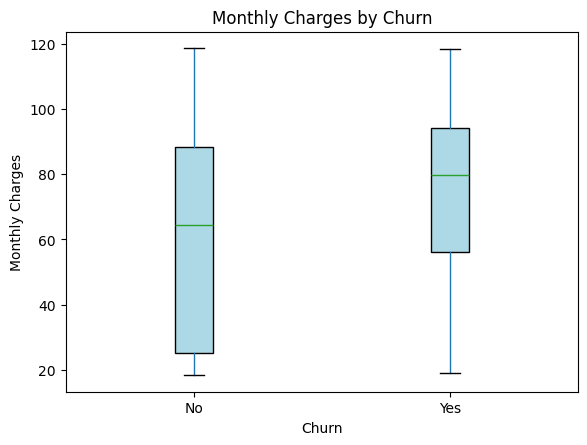

In [8]:
# Boxplot of MonthlyCharges vs Churn
plt.figure(figsize=(8, 5))
df.boxplot(column='MonthlyCharges', by='Churn', grid=False, patch_artist=True, 
           boxprops=dict(facecolor='lightblue'))
plt.title('Monthly Charges by Churn')
plt.suptitle('')  # Remove default title
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

<Figure size 800x500 with 0 Axes>

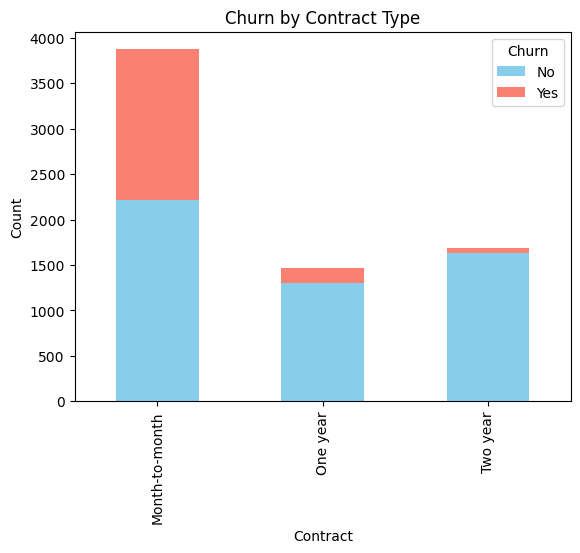

In [9]:
# Countplot for Contract vs Churn
plt.figure(figsize=(8, 5))
df.groupby(['Contract', 'Churn']).size().unstack().plot(kind='bar', stacked=True, 
                                                        color=['skyblue', 'salmon'])
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

In [10]:
median_charge = df['MonthlyCharges'].median()
df['HighPaying'] = df['MonthlyCharges'].apply(lambda x: 'Yes' if x > median_charge else 'No')

# Check new feature
print(df['HighPaying'].value_counts())

HighPaying
No     3519
Yes    3513
Name: count, dtype: int64


In [11]:
senior_churn = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 'Yes')]
print(senior_churn.shape)  # Number of senior citizens who churned

(476, 22)


In [12]:
churn_summary = df.groupby('Churn')[['tenure', 'MonthlyCharges']].mean()
print(churn_summary)

          tenure  MonthlyCharges
Churn                           
No     37.650010       61.307408
Yes    17.979133       74.441332


In [13]:
# Save the cleaned and manipulated dataset
df.to_csv('telco_churn_cleaned.csv', index=False)

In [14]:
import pandas as pd
import numpy as np

# Simulate external data (e.g., satisfaction scores)
external_data = pd.DataFrame({
    'customerID': df['customerID'],
    'SatisfactionScore': np.random.randint(1, 6, size=len(df))  # Random scores 1-5
})

# Merge with original dataset
df = df.merge(external_data, on='customerID', how='left')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0          

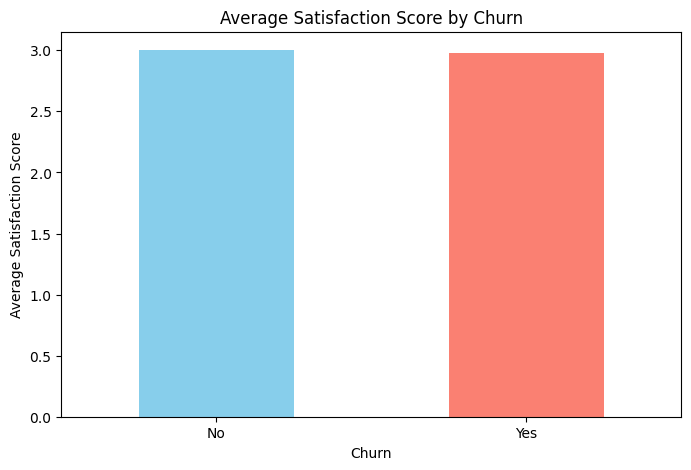

In [15]:
plt.figure(figsize=(8, 5))
df.groupby('Churn')['SatisfactionScore'].mean().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Satisfaction Score by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=0)
plt.show()

In [16]:
# One-hot encoding for categorical variables
categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Outlier detection for TotalCharges (using IQR)
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['TotalCharges'] = df['TotalCharges'].clip(lower=lower_bound, upper=upper_bound)

print(df['TotalCharges'].describe())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


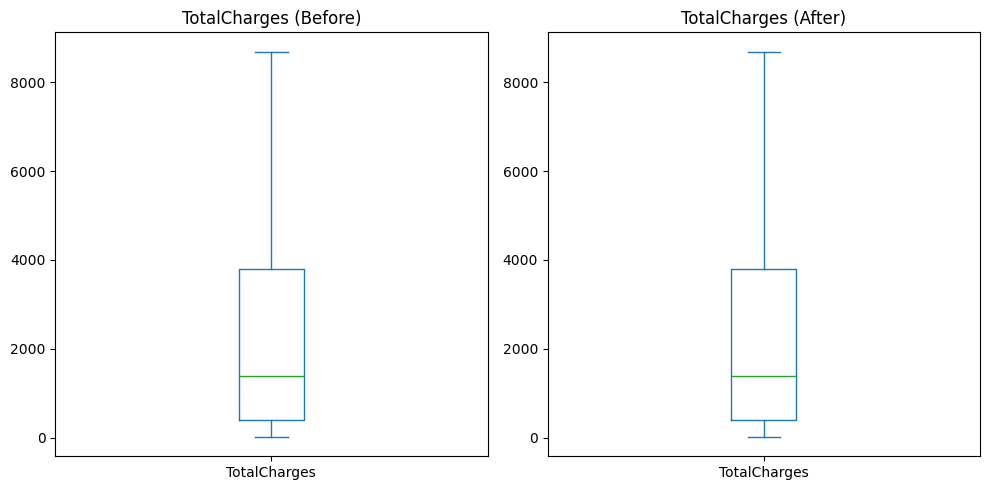

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['TotalCharges'].plot(kind='box', title='TotalCharges (Before)')
plt.subplot(1, 2, 2)
df['TotalCharges'].clip(lower=lower_bound, upper=upper_bound).plot(kind='box', title='TotalCharges (After)')
plt.tight_layout()
plt.show()